In [27]:
import pandas as pd
from IPython.display import FileLink

# Definir caminho do arquivo CSV
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Bases clustering\MICRODADOS_ENEM_2023.csv"

# Carregar o arquivo CSV com o separador correto
try:
    df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
    print("Arquivo carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")
    exit()

# Verificar colunas do DataFrame
print("Colunas no DataFrame:", df.columns.tolist())

# Lista das capitais do Nordeste
capitais_nordeste = [
    "Aracaju", "Fortaleza", "João Pessoa", "Maceió", "Natal",
    "Recife", "Salvador", "São Luís", "Teresina"
]

# Filtrar alunos que fizeram a prova nas capitais do Nordeste
df = df[df["NO_MUNICIPIO_ESCOLA"].isin(capitais_nordeste)]

# Filtrar apenas alunos que concluíram o ensino médio (código pode variar)
df = df[df["TP_ST_CONCLUSAO"].isin(["1", "2"])]  # Verifique se "2" representa "concluído" nos dados

# Removendo possíveis valores ausentes
df = df.dropna()

colunas_relevantes = [
    "Q006", "Q001", "Q002","Q004","Q003", "Q005", "Q024", "Q025", "Q022", 
    "NO_MUNICIPIO_PROVA", "TP_FAIXA_ETARIA", "TP_SEXO", "TP_ST_CONCLUSAO", "TP_COR_RACA","NU_NOTA_CN", "NU_NOTA_CH","TP_DEPENDENCIA_ADM_ESC","TP_LOCALIZACAO_ESC",
    "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO","TP_ESCOLA"
]

df = df[colunas_relevantes]

# Definir o caminho de saída para o arquivo tratado
caminho_saida = r"C:\Users\CWS\Documents\TCC\Meu tcc\microdados_enem_tratados.csv"

# Salvando os dados tratados com o separador correto
df.to_csv(caminho_saida, index=False, encoding="utf-8", sep=";")

# Exibir as primeiras linhas do dataframe tratado
print(df.head())

# Criar um link de download para o arquivo CSV
display(FileLink(caminho_saida))

Arquivo carregado com sucesso!
Colunas no DataFrame: ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q0

KeyError: 'NO_MUNICIPIO_ESCOLA'

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import FileLink

# Carregar os dados
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Meu tcc\microdados_enem_tratados.csv"
try:
    df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
    print("Arquivo carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")
    exit()

# 1. FILTRAGEM INICIAL

# Filtrar alunos que concluíram ou estão concluindo o Ensino Médio
df = df[df["TP_ST_CONCLUSAO"].isin(["1", "2"])]  # 1=Concluído, 2=Concluindo em 2023

# 2. TRATAMENTO DE VARIÁVEIS ESPECÍFICAS
# Remover "Não declarado" e "Não dispõe da informação" em TP_COR_RACA
df = df[~df["TP_COR_RACA"].isin(["0", "6"])]

# Recodificar TP_COR_RACA: 1 (Branca) → 1; outros → 0
df["TP_COR_RACA"] = df["TP_COR_RACA"].replace({"1": 1, "2": 0, "3": 0, "4": 0, "5": 0})

# Remover "Não sei" (H) das questões de escolaridade
for col in ["Q001", "Q002", "Q003", "Q004"]:
    df = df[df[col] != "H"]

# 3. ENCODING DE VARIÁVEIS
# Aplicar One-Hot Encoding para variáveis nominais
df = pd.get_dummies(df, columns=["TP_SEXO", "TP_LOCALIZACAO_ESC"], drop_first=True)

# Aplicar Label Encoding para variáveis ordinais
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q001", "Q002", "Q003", "Q004", "Q024", "Q025","Q006","Q022", "TP_ESCOLA", "TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Opcional: salvar os encoders

# Converter variáveis binárias (1=Sim, 2=Não → 1, 0)
colunas_binarias = ["Q022", "Q024", "Q025"]
df[colunas_binarias] = df[colunas_binarias].replace({"1": 1, "2": 0})

# 4. SALVAR DADOS TRATADOS
caminho_saida = r"C:\Users\CWS\Documents\TCC\Meu tcc\microdados_enem_tratados2.csv"
df.to_csv(caminho_saida, index=False, encoding="latin1", sep=";")

# Verificar resultado
print("\nDados após pré-processamento:")
print(df.head())


Arquivo carregado com sucesso!


C:\Users\CWS\AppData\Local\Temp\ipykernel_7572\3348879359.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TP_COR_RACA"] = df["TP_COR_RACA"].replace({"1": 1, "2": 0, "3": 0, "4": 0, "5": 0})



Dados após pré-processamento:
   Q006  Q001  Q002  Q004  Q003 Q005  Q024  Q025  Q022 NO_MUNICIPIO_PROVA  \
0     2     3     3     1     1    5     0     1     3          Fortaleza   
1     1     4     4     3     5    2     0     1     1          Fortaleza   
2     2     3     3     1     1    4     0     1     1          Fortaleza   
3     1     0     1     0     1    5     0     1     2            MaceiÃ³   
4     2     3     3     1     1    2     0     1     2          Fortaleza   

   ...  TP_COR_RACA NU_NOTA_CN  NU_NOTA_CH TP_DEPENDENCIA_ADM_ESC NU_NOTA_LC  \
0  ...            0        459       508.5                      1      507.2   
1  ...            0      499.1       546.8                      1        533   
2  ...            0      495.6       367.7                      1      425.3   
3  ...            0      461.8       591.2                      1      561.3   
4  ...            0      470.5       526.2                      1      509.6   

   NU_NOTA_MT NU_NOTA_RED

In [7]:
!pip install geobr

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ----------- ---------------------------- 5.5/19.2 MB 25.8 MB/s eta 0:00:01
   ---------------------- ----------------- 11.0/19.2 MB 26.5 MB/s eta 0:00:01
   ---------------------------------- ----- 16.5/19.2 MB 26.6 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.3 MB 25.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.1/6.3 MB 5.3 MB/s eta 0:00:01
   ------------- -------------------------- 2.1/6.3 MB 5.3 MB/s eta 0:00:01
   ------------- -------------------------- 2.1/6.3 MB 5.3 MB/s eta 0:00:01
   -------------------- ------------------- 3.1/6.3 MB 2.8 MB/s eta 0:00:02
   ----------------

C:\Users\CWS\AppData\Local\Temp\ipykernel_7572\354263764.py:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(nordeste.geometry.centroid.x, nordeste.geometry.centroid.y, nordeste['UF']):


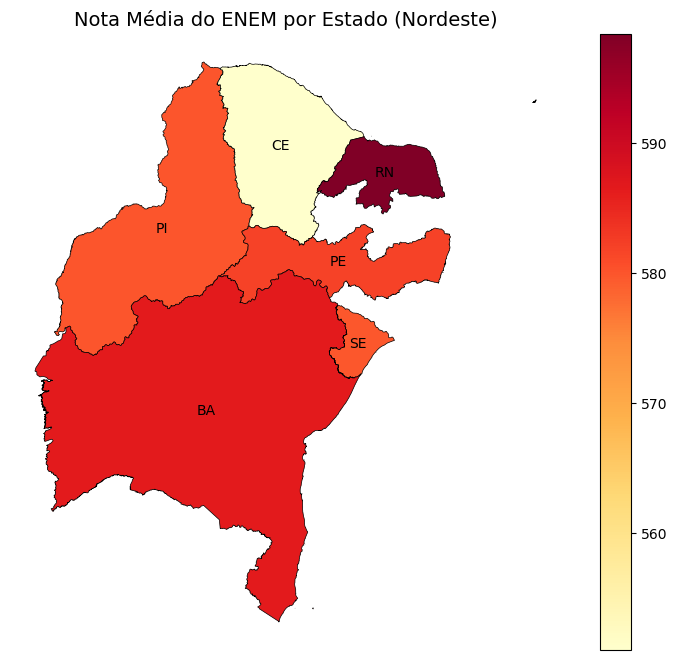

Imagem salva com sucesso em: C:\Users\CWS\Documents\TCC\Meu tcc\imagem2\nota_enem_nordeste.png


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import geobr

# 1. Carregar e preparar os dados do ENEM
df = pd.read_csv(r"C:\Users\CWS\Documents\TCC\Meu tcc\microdados_enem_tratados2.csv", sep=";", encoding="utf-8")

# Mapeamento de municípios para UF
estados_nordeste = {
    "Aracaju": "SE", "Fortaleza": "CE", "João Pessoa": "PB",
    "Maceió": "AL", "Natal": "RN", "Recife": "PE",
    "Salvador": "BA", "São Luís": "MA", "Teresina": "PI"
}

# Criar coluna UF e calcular nota média
df['UF'] = df['NO_MUNICIPIO_PROVA'].map(estados_nordeste)
df['NOTA_MEDIA'] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
nota_por_estado = df.groupby('UF')['NOTA_MEDIA'].mean().reset_index()

# 2. Obter dados geográficos de TODOS os estados e filtrar apenas Nordeste
estados_br = geobr.read_state(year=2020)  # Usando o ano mais recente disponível
nordeste = estados_br[estados_br['abbrev_state'].isin(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'])]

# 3. Juntar dados educacionais com geográficos
nordeste = nordeste.merge(nota_por_estado, left_on='abbrev_state', right_on='UF')

# 4. Configurar o plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotar o mapa
nordeste.plot(column='NOTA_MEDIA', 
              cmap='YlOrRd',
              legend=True,
              ax=ax,
              edgecolor='black',
              linewidth=0.5)

# Adicionar rótulos dos estados
for x, y, label in zip(nordeste.geometry.centroid.x, nordeste.geometry.centroid.y, nordeste['UF']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

# Configurações estéticas
ax.set_title('Nota Média do ENEM por Estado (Nordeste)', fontsize=14)
ax.axis('off')

# Salvar no diretório especificado
caminho_imagem = r"C:\Users\CWS\Documents\TCC\Meu tcc\imagem2\nota_enem_nordeste.png"
plt.savefig(caminho_imagem, dpi=300, bbox_inches='tight')
plt.show()

print(f"Imagem salva com sucesso em: {caminho_imagem}")

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
print("Tamanho do DataFrame após leitura:", df.shape)

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "Q003", "Q001", "Q006", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "Q022", "Q005", "Q024", "Q025", "Q002","Q004", "TP_ESCOLA", "NO_MUNICIPIO_PROVA","TP_DEPENDENCIA_ADM_ESC","TP_LOCALIZACAO_ESC"]

df = df[variaveis_notas + colunas_relevantes]
print("Tamanho do DataFrame após selecionar colunas relevantes:", df.shape)

# Converter colunas de notas para numéricas
df[variaveis_notas] = df[variaveis_notas].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)
print("Tamanho do DataFrame após remover valores ausentes nas notas:", df.shape)

# Feature Engineering: Criar novas variáveis
df["QTD_PESSOAS_RESIDENCIA"] = df["Q005"].astype(float)

# Mapear os valores de Q006 para numéricos
df["Q006"] = df["Q006"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17}).astype(float)

# Mapear valores categóricos de Q001 e Q002 para numéricos
mapeamento_escolaridade = {
    'A': 1,  # Nunca estudou
    'B': 2,  # Não completou a 4ª série/5º ano do Ensino Fundamental
    'C': 3,  # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
    'D': 4,  # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
    'E': 5,  # Completou o Ensino Médio, mas não completou a Faculdade
    'F': 6,  # Completou a Faculdade, mas não completou a Pós-graduação
    'G': 7,  # Completou a Pós-graduação
    'H': 8   # Não sei
}

# Aplicar o mapeamento às colunas Q001 e Q002
df["Q001"] = df["Q001"].map(mapeamento_escolaridade).astype(float)
df["Q002"] = df["Q002"].map(mapeamento_escolaridade).astype(float)

# Converter a coluna Q005 para numérico
df["Q005"] = pd.to_numeric(df["Q005"], errors='coerce')


# Agregação de dados (exemplo: média ponderada das notas por escola)
df["MEDIA_NOTA_ESCOLA"] = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)


# Dividir os dados em treino e teste ANTES de qualquer transformação
X = df.drop(columns=variaveis_notas)
y = df[variaveis_notas]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Label Encoding para variáveis ordinais
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q003", "Q001", "Q002", "Q024", "Q025", "Q010", "Q011", "Q008", "Q012", "Q014", "Q022", "Q013", "TP_ESCOLA","Q004","TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Garantir consistência com treino
    label_encoders[col] = le

# Aplicar One-Hot Encoding para variáveis nominais
variaveis_one_hot = ["TP_SEXO", "TP_COR_RACA","NO_MUNICIPIO_PROVA","TP_LOCALIZACAO_ESC"]
X_train = pd.get_dummies(X_train, columns=variaveis_one_hot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=variaveis_one_hot, drop_first=True)

# Garantir que as colunas de treino e teste sejam as mesmas
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

print("Tamanho final do X_train:", X_train.shape)
print("Tamanho final do X_test:", X_test.shape)

# Seleção de Features: Importância das Features
modelo_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
modelo_xgb.fit(X_train, y_train["MEDIA_NOTA_ESCOLA"])  # Exemplo para a nota ponderada

# Obter a importância das features
importancias = modelo_xgb.feature_importances_
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importancias
}).sort_values(by="Importance", ascending=False)

print("Importância das Features:")
print(feature_importances)

# Selecionar as top 20 features mais importantes
top_features = feature_importances.head(20)["Feature"].tolist()
X_train = X_train[top_features]
X_test = X_test[top_features]

# Balanceamento de Dados: Verificar distribuição das notas
plt.hist(y_train["MEDIA_NOTA_ESCOLA"], bins=50)
plt.title("Distribuição das Notas ")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# Ajuste de Hiperparâmetros com RandomizedSearchCV
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Modelagem individual por nota
resultados = {}
for nota in variaveis_notas:
    y_train_nota = y_train[nota]
    y_test_nota = y_test[nota]
    
    modelo_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
    random_search = RandomizedSearchCV(modelo_xgb, param_distributions=param_dist, n_iter=50, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train_nota)
    
    melhor_modelo = random_search.best_estimator_
    
    # Fazer previsões no treino e no teste
    y_pred_train = melhor_modelo.predict(X_train)
    y_pred_test = melhor_modelo.predict(X_test)

    # Calcular métricas no treino
    mae_train = mean_absolute_error(y_train_nota, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train_nota, y_pred_train))
    r2_train = r2_score(y_train_nota, y_pred_train)

    # Calcular métricas no teste
    mae_test = mean_absolute_error(y_test_nota, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test_nota, y_pred_test))
    r2_test = r2_score(y_test_nota, y_pred_test)

    # Armazenar resultados
    resultados[nota] = {
        "Treino": {"MAE": mae_train, "RMSE": rmse_train, "R²": r2_train},
        "Teste": {"MAE": mae_test, "RMSE": rmse_test, "R²": r2_test}
    }

    # Exibir resultados para cada nota
    print(f"Resultados para {nota}:")
    print("Treino - MAE:", mae_train, "RMSE:", rmse_train, "R²:", r2_train)
    print("Teste - MAE:", mae_test, "RMSE:", rmse_test, "R²:", r2_test)
    print("-" * 50)

# Exibir todos os resultados
print("Resultados finais:")
print(resultados)


Tamanho do DataFrame após leitura: (62874, 37)
Tamanho do DataFrame após selecionar colunas relevantes: (62874, 27)
Tamanho do DataFrame após remover valores ausentes nas notas: (62874, 27)
Tamanho final do X_train: (50299, 35)
Tamanho final do X_test: (12575, 35)


KeyError: 'MEDIA_NOTA_ESCOLA'

Tamanho do DataFrame após leitura: (62874, 37)
Tamanho do DataFrame após selecionar colunas relevantes: (62874, 27)
Tamanho do DataFrame após remover valores ausentes nas notas: (62874, 27)

Resumo Estatístico das Notas:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  62874.000000  62874.000000  62874.000000  62874.000000     62874.000000
mean     505.778419    534.216896    528.514041    559.916302       678.540255
std       91.063811     90.726043     77.323020    139.612030       224.519677
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      444.200000    475.000000    479.900000    446.200000       560.000000
50%      502.700000    541.600000    533.700000    553.800000       720.000000
75%      563.800000    599.500000    583.400000    665.200000       860.000000
max      856.700000    823.000000    820.800000    958.600000      1000.000000

Distribuição das Notas:


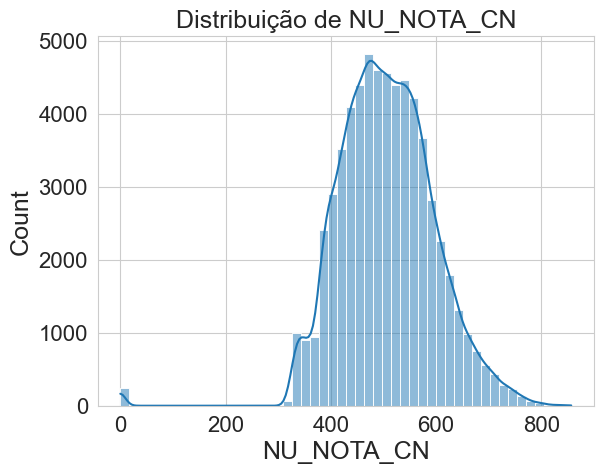

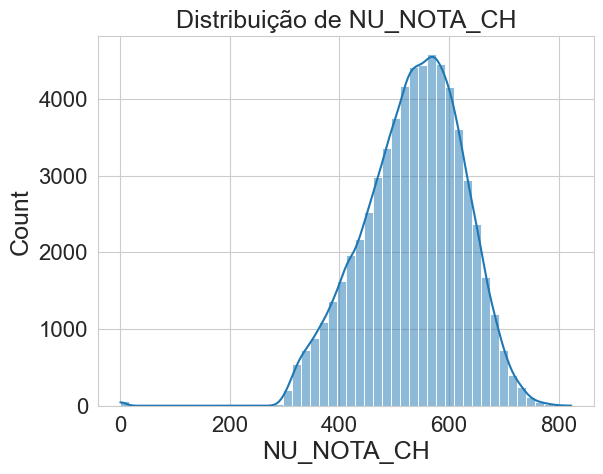

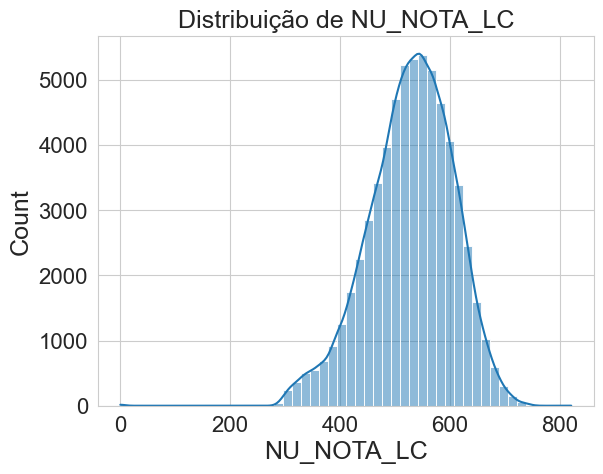

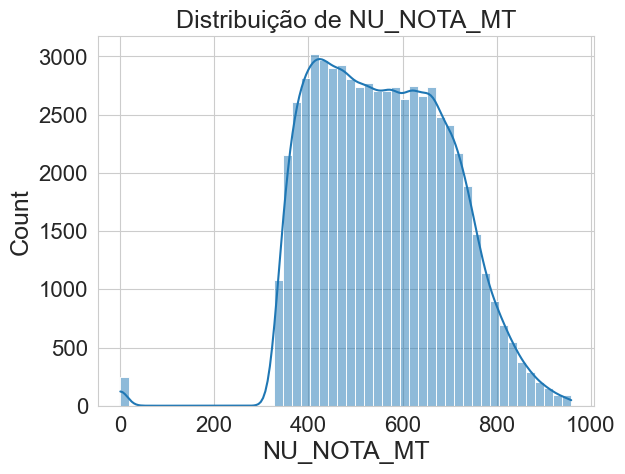

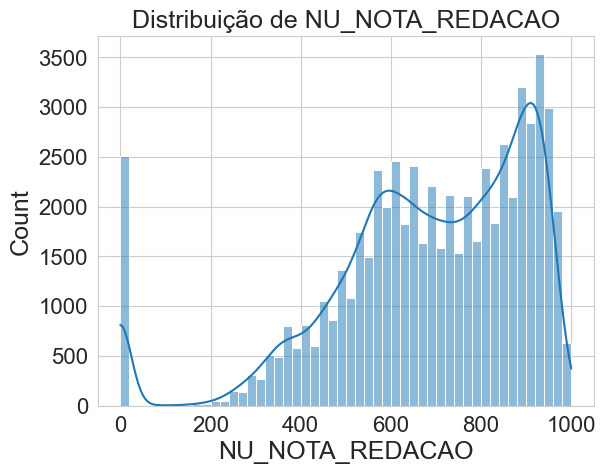


Distribuição por Categorias Chave:


C:\Users\CWS\AppData\Local\Temp\ipykernel_21192\943983890.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


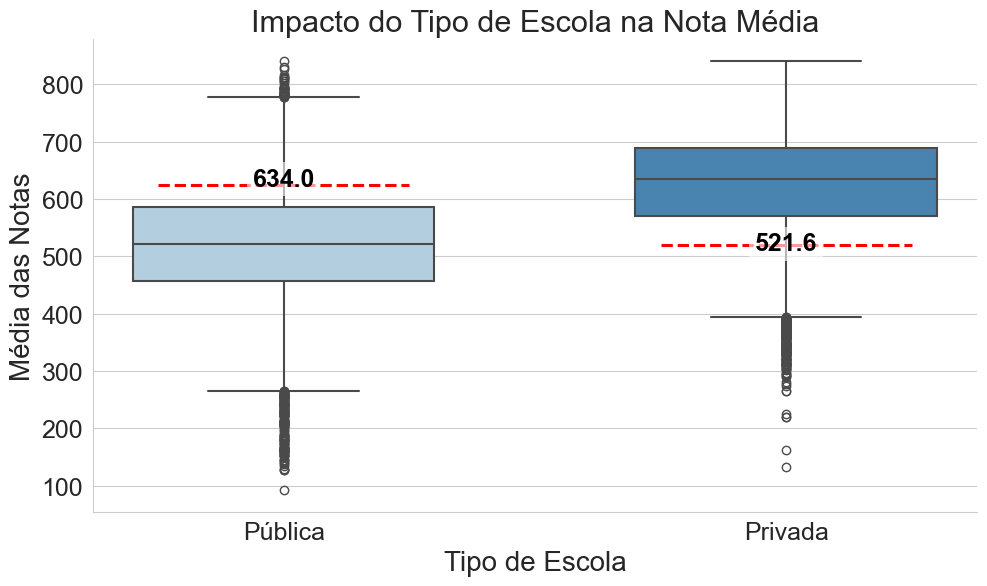

C:\Users\CWS\AppData\Local\Temp\ipykernel_21192\943983890.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Q006"], y=df["MEDIA_NOTA_ESCOLA"], palette="Blues")


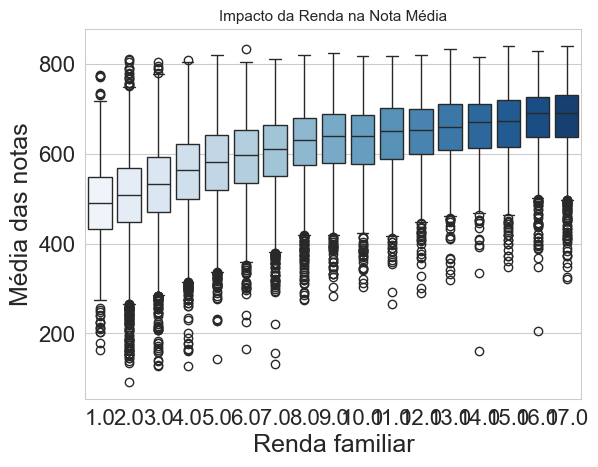

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
import matplotlib as mpl

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\meu\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
print("Tamanho do DataFrame após leitura:", df.shape)

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "Q003", "Q001", "Q006", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "Q022", "Q005", "Q024", "Q025", "Q002", "Q004", "TP_ESCOLA", "NO_MUNICIPIO_PROVA", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC"]

df = df[variaveis_notas + colunas_relevantes]
print("Tamanho do DataFrame após selecionar colunas relevantes:", df.shape)

# Converter colunas de notas para numéricas
df[variaveis_notas] = df[variaveis_notas].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)
print("Tamanho do DataFrame após remover valores ausentes nas notas:", df.shape)


# Mapear os valores de Q006 para numéricos
df["Q006"] = df["Q006"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17}).astype(float)


# Mapear valores categóricos de Q001 e Q002 para numéricos
mapeamento_escolaridade = {
    'A': 1,  # Nunca estudou
    'B': 2,  # Não completou a 4ª série/5º ano do Ensino Fundamental
    'C': 3,  # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
    'D': 4,  # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
    'E': 5,  # Completou o Ensino Médio, mas não completou a Faculdade
    'F': 6,  # Completou a Faculdade, mas não completou a Pós-graduação
    'G': 7,  # Completou a Pós-graduação
    'H': 8   # Não sei
}

# Aplicar o mapeamento às colunas Q001 e Q002
df["Q001"] = df["Q001"].map(mapeamento_escolaridade).astype(float)
df["Q002"] = df["Q002"].map(mapeamento_escolaridade).astype(float)

# Converter a coluna Q005 para numérico
df["Q005"] = pd.to_numeric(df["Q005"], errors='coerce')

# Agregação de dados (exemplo: média ponderada das notas por escola)
df["MEDIA_NOTA_ESCOLA"] = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

# Dividir os dados em treino e teste
X = df.drop(columns=variaveis_notas)  # Features
y = df["MEDIA_NOTA_ESCOLA"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Label Encoding para variáveis ordinais
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q003", "Q001", "Q002", "Q024", "Q025", "Q010", "Q011", "Q008", "Q012", "Q014", "Q022", "Q013", "TP_ESCOLA","Q004","TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Garantir consistência com treino
    label_encoders[col] = le

# Aplicar One-Hot Encoding para variáveis nominais
variaveis_one_hot = ["TP_SEXO", "TP_COR_RACA", "NO_MUNICIPIO_PROVA", "TP_LOCALIZACAO_ESC"]
X_train = pd.get_dummies(X_train, columns=variaveis_one_hot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=variaveis_one_hot, drop_first=True)

# Garantir que as colunas de treino e teste sejam as mesmas
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Análises Exploratórias
# Configurar fonte Arial tamanho 11
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 11


# 3) Paleta "Blues"
pal = sns.color_palette("Blues", n_colors=5)

# 1. Estatísticas Descritivas
print("\nResumo Estatístico das Notas:")
print(df[variaveis_notas].describe())

# 2. Distribuição das Notas
print("\nDistribuição das Notas:")
for nota in variaveis_notas:
    sns.histplot(df[nota], bins=50, kde=True)
    plt.title(f'Distribuição de {nota}')
    plt.savefig(r"C:\Users\CWS\Documents\meu\Meu tcc\imagens\distribuição_notas.png", dpi=300, bbox_inches='tight')
    plt.show()

# 3. Distribuição por Categorias Chave
print("\nDistribuição por Categorias Chave:")

# 2) Estilo mais clean
sns.set_style("whitegrid", {
    'grid.color':      '.9',
    'axes.edgecolor':  '.2'
})

# --- Ajuste dos rótulos do tipo de escola ---
df["TP_ESCOLA_LABEL"] = df["TP_ESCOLA"].map({
    "2": "Pública",
    "3": "Privada"
})

# Cálculo da mediana e média
estatisticas = df.groupby("TP_ESCOLA_LABEL")["MEDIA_NOTA_ESCOLA"].agg(["median", "mean"]).reset_index()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.boxplot(
    x=df["TP_ESCOLA_LABEL"],
    y=df["MEDIA_NOTA_ESCOLA"],
    palette="Blues",
    width=0.6,
    linewidth=1.5
)

# ------------------------------
# Linhas e textos com fontes grandes
# ------------------------------

# Linha da média
for i, row in estatisticas.iterrows():
    media = row["mean"]
    ax.hlines(
        y=media,
        xmin=i - 0.25,
        xmax=i + 0.25,
        color="red",
        linewidth=2.2,
        linestyles="--"
    )

# Texto da mediana sobre o boxplot
for i, row in estatisticas.iterrows():
    mediana = row["median"]
    ax.text(
        i,
        mediana,
        f"{mediana:.1f}",
        ha='center',
        va='center',
        fontsize=18,
        fontweight='bold',
        color="black",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.6)
    )

# ----------------------------------
# Ajustes de fontes dos eixos e título
# ----------------------------------

ax.set_title("Impacto do Tipo de Escola na Nota Média", fontsize=22, fontfamily='Arial')
ax.set_xlabel("Tipo de Escola", fontsize=20, fontfamily='Arial')
ax.set_ylabel("Média das Notas", fontsize=20, fontfamily='Arial')

plt.xticks(fontsize=18, fontfamily='Arial')
plt.yticks(fontsize=18, fontfamily='Arial')

# Estética: remover bordas superiores e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(
    r"C:\Users\CWS\Documents\meu\Meu tcc\imagens\impacto_escola_matematica_ajustado.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


# Impacto da Renda na Nota Média
sns.boxplot(x=df["Q006"], y=df["MEDIA_NOTA_ESCOLA"], palette="Blues")
plt.title("Impacto da Renda na Nota Média", fontsize=11)
plt.xlabel("Renda familiar")
plt.ylabel("Média das notas")
plt.savefig(r"C:\Users\CWS\Documents\meu\Meu tcc\imagens\impacto_renda_nota_matemática.png", dpi=300, bbox_inches='tight')
plt.show()



Tamanho do DataFrame após leitura: (62874, 37)
Tamanho do DataFrame após selecionar colunas relevantes: (62874, 27)
Tamanho do DataFrame após remover valores ausentes nas notas: (62874, 27)
Atenção: 'NO_MUNICIPIO_PROVA' possui alta cardinalidade e pode criar muitas colunas com One-Hot Encoding.
Considere outras estratégias de codificação ou remoção se o desempenho for afetado.

Resumo Estatístico por Tipo de Escola:
           Quantidade de Escolas   Média  Mediana  Desvio Padrão  Mínimo  \
TP_ESCOLA                                                                  
2                          38140  520.08   521.61          94.27   92.00   
3                          24734  625.10   634.05          86.90  132.84   

           Máximo  
TP_ESCOLA          
2          840.88  
3          840.46  

Não foi possível realizar o teste de Kruskal-Wallis devido a dados insuficientes (menos de 5 observações) em um ou mais grupos de 'TP_ESCOLA'.


<Figure size 1000x600 with 0 Axes>

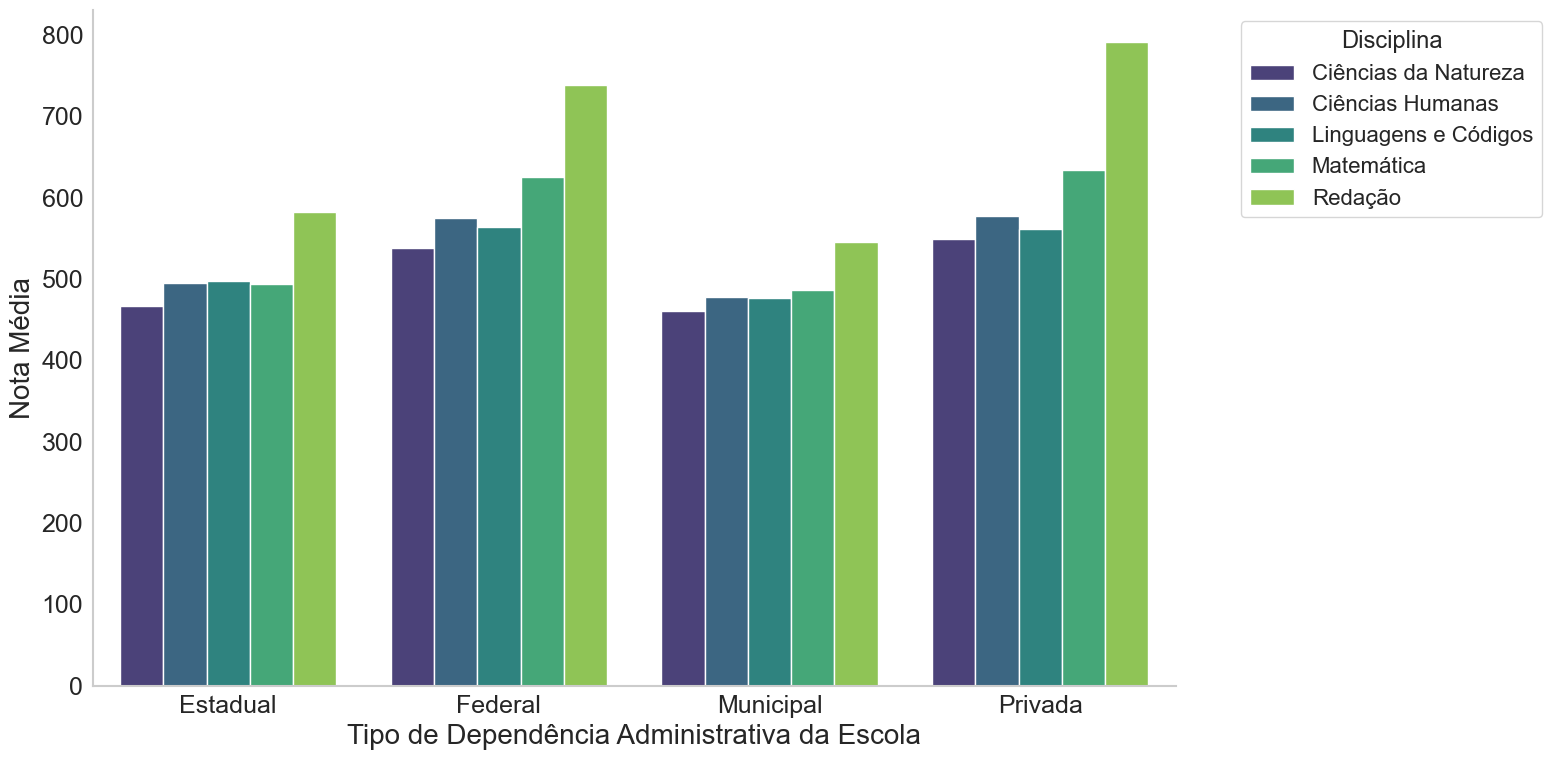

C:\Users\CWS\AppData\Local\Temp\ipykernel_21192\1651216199.py:317: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


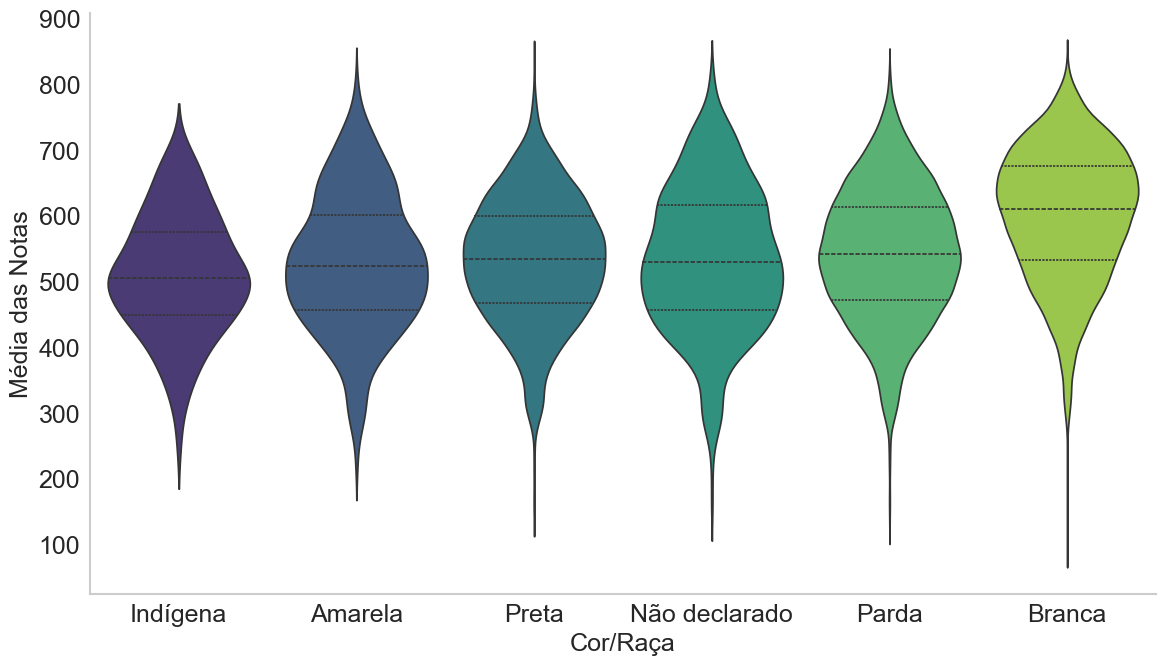

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor # Even if not used in this specific plot, it's in your imports

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\meu\Bases clustering\microdados_enem_tratados5.csv"
try:
    df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
    print("Tamanho do DataFrame após leitura:", df.shape)
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em {caminho_arquivo}")
    exit()
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")
    exit()

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "Q003", "Q001", "Q006", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "Q022", "Q005", "Q024", "Q025", "Q002", "Q004", "TP_ESCOLA", "NO_MUNICIPIO_PROVA", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC"]

# Filtrar colunas existentes no DataFrame
colunas_presentes = [col for col in variaveis_notas + colunas_relevantes if col in df.columns]
df = df[colunas_presentes]
print("Tamanho do DataFrame após selecionar colunas relevantes:", df.shape)

# Verificar se todas as variáveis de notas estão presentes
if not all(nota in df.columns for nota in variaveis_notas):
    print("Erro: Nem todas as colunas de notas esperadas foram encontradas no DataFrame.")
    print("Colunas de notas esperadas:", variaveis_notas)
    print("Colunas presentes no DataFrame:", df.columns)
    exit()

# Converter colunas de notas para numéricas
df[variaveis_notas] = df[variaveis_notas].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)
print("Tamanho do DataFrame após remover valores ausentes nas notas:", df.shape)

# Mapear os valores de Q006 para numéricos
if "Q006" in df.columns:
    df["Q006"] = df["Q006"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17}).astype(float)
else:
    print("A coluna Q006 não foi encontrada no DataFrame.")

# Mapear valores categóricos de Q001 e Q002 para numéricos
mapeamento_escolaridade = {
    'A': 1,  # Nunca estudou
    'B': 2,  # Não completou a 4ª série/5º ano do Ensino Fundamental
    'C': 3,  # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
    'D': 4,  # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
    'E': 5,  # Completou o Ensino Médio, mas não completou a Faculdade
    'F': 6,  # Completou a Faculdade, mas não completou a Pós-graduação
    'G': 7,  # Completou a Pós-graduação
    'H': 8   # Não sei
}

# Aplicar o mapeamento às colunas Q001 e Q002
if "Q001" in df.columns:
    df["Q001"] = df["Q001"].map(mapeamento_escolaridade).astype(float)
else:
    print("A coluna Q001 não foi encontrada no DataFrame.")

if "Q002" in df.columns:
    df["Q002"] = df["Q002"].map(mapeamento_escolaridade).astype(float)
else:
    print("A coluna Q002 não foi encontrada no DataFrame.")

# Converter a coluna Q005 para numérico
if "Q005" in df.columns:
    df["Q005"] = pd.to_numeric(df["Q005"], errors='coerce')
else:
    print("A coluna Q005 não foi encontrada no DataFrame.")

# Agregação de dados (exemplo: média ponderada das notas por escola)
if all(nota in df.columns for nota in ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]):
    df["MEDIA_NOTA_ESCOLA"] = df[variaveis_notas].mean(axis=1)
else:
    print("Erro: Alguma das colunas de notas não está presente para calcular a média.")
    exit()

# --- Criar uma cópia do DataFrame antes da divisão para manter os valores originais para a análise exploratória ---
# ESTA É A LINHA CRÍTICA PARA RESOLVER O NameError!
df_exploratorio = df.copy()

# Dividir os dados em treino e teste
X = df.drop(columns=variaveis_notas + ["MEDIA_NOTA_ESCOLA"])  # Features, remove 'MEDIA_NOTA_ESCOLA' as it's the target
y = df["MEDIA_NOTA_ESCOLA"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Label Encoding para variáveis ordinais
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q003", "Q001", "Q002", "Q024", "Q025", "Q010", "Q011", "Q008", "Q012", "Q014", "Q022", "Q013", "TP_ESCOLA","Q004","TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    if col in X_train.columns:
        le = LabelEncoder()
        # Fit on combined data to ensure all categories are seen by the encoder
        # This prevents errors if a category exists in test but not in train
        combined_data = pd.concat([X_train[col], X_test[col]], axis=0).astype(str) # Ensure string type for LabelEncoder
        le.fit(combined_data)
        X_train[col] = le.transform(X_train[col].astype(str))
        if col in X_test.columns:
            X_test[col] = le.transform(X_test[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"A coluna {col} não foi encontrada em X_train para Label Encoding.")

# Aplicar One-Hot Encoding para variáveis nominais
variaveis_one_hot = ["TP_SEXO", "TP_COR_RACA", "NO_MUNICIPIO_PROVA", "TP_LOCALIZACAO_ESC"]

# Handle NO_MUNICIPIO_PROVA specifically due to high cardinality
if "NO_MUNICIPIO_PROVA" in variaveis_one_hot:
    print("Atenção: 'NO_MUNICIPIO_PROVA' possui alta cardinalidade e pode criar muitas colunas com One-Hot Encoding.")
    print("Considere outras estratégias de codificação ou remoção se o desempenho for afetado.")

X_train = pd.get_dummies(X_train, columns=[col for col in variaveis_one_hot if col in X_train.columns], drop_first=True)
X_test = pd.get_dummies(X_test, columns=[col for col in variaveis_one_hot if col in X_test.columns], drop_first=True)

# Garantir que as colunas de treino e teste sejam as mesmas
missing_cols_train = set(X_test.columns) - set(X_train.columns)
for col in missing_cols_train:
    X_train[col] = 0

missing_cols_test = set(X_train.columns) - set(X_test.columns)
for col in missing_cols_test:
    X_test[col] = 0

X_test = X_test[X_train.columns]


## Análises Exploratórias


# Mapeamento das categorias para TP_DEPENDENCIA_ADM_ESC
mapeamento_dependencia = {
    "1": "Federal",
    "2": "Estadual",
    "3": "Municipal",
    "4": "Privada"
}

# Aplicar o mapeamento no DataFrame df_exploratorio (copia para análise exploratória)
# Garante que os valores de 'TP_DEPENDENCIA_ADM_ESC' sejam mapeados antes da agregação
if "TP_DEPENDENCIA_ADM_ESC" in df_exploratorio.columns:
    df_exploratorio["TP_DEPENDENCIA_ADM_ESC"] = df_exploratorio["TP_DEPENDENCIA_ADM_ESC"].map(mapeamento_dependencia)
else:
    print("A coluna 'TP_DEPENDENCIA_ADM_ESC' não foi encontrada para mapeamento.")


if "TP_ESCOLA" in df_exploratorio.columns and "MEDIA_NOTA_ESCOLA" in df_exploratorio.columns:
    # Definindo o tamanho da figura
    plt.figure(figsize=(10, 6))

    # Calcular a média das notas para cada tipo de escola
    medias_por_escola = df_exploratorio.groupby("TP_ESCOLA")["MEDIA_NOTA_ESCOLA"].mean()
    # Tabela com estatísticas descritivas
    tabela_resumo = df_exploratorio.groupby("TP_ESCOLA")["MEDIA_NOTA_ESCOLA"].agg(
        ["count", "mean", "median", "std", "min", "max"]
    ).round(2).rename(
        columns={
            "count": "Quantidade de Escolas",
            "mean": "Média",
            "median": "Mediana",
            "std": "Desvio Padrão",
            "min": "Mínimo",
            "max": "Máximo"
        }
    )

    # Salva em CSV
    tabela_resumo.to_csv(r"C:\Users\CWS\Documents\meu\Meu tcc\imagens\resumo_estatistico.csv")

    # Exibe a tabela (para Jupyter/IDE)
    print("\nResumo Estatístico por Tipo de Escola:")
    # display(tabela_resumo) # Comentado para evitar erro se display não estiver disponível
    print(tabela_resumo)


    # Separa os grupos
    publica = df_exploratorio[df_exploratorio["TP_ESCOLA"] == "Pública"]["MEDIA_NOTA_ESCOLA"].dropna()
    privada = df_exploratorio[df_exploratorio["TP_ESCOLA"] == "Privada"]["MEDIA_NOTA_ESCOLA"].dropna()
    nao_respondeu = df_exploratorio[df_exploratorio["TP_ESCOLA"] == "Não Respondeu"]["MEDIA_NOTA_ESCOLA"].dropna()

    # Executa o teste de Kruskal-Wallis apenas se houver dados suficientes em cada grupo
    # Kruskal-Wallis requires at least 5 observations per group to be reliable
    if len(publica) >= 5 and len(privada) >= 5 and len(nao_respondeu) >= 5:
        from scipy.stats import kruskal
        stat, p_value = kruskal(publica, privada, nao_respondeu)

        print(f"\nEstatística do teste de Kruskal-Wallis: {stat:.2f}")
        print(f"Valor-p: {p_value:.4f}")

        # Interpretação
        if p_value < 0.05:
            print("Há diferenças estatisticamente significativas entre as médias de notas dos diferentes tipos de escola (Kruskal-Wallis).")
        else:
            print("Não há diferenças estatisticamente significativas entre as médias de notas dos diferentes tipos de escola (Kruskal-Wallis).")
    else:
        print("\nNão foi possível realizar o teste de Kruskal-Wallis devido a dados insuficientes (menos de 5 observações) em um ou mais grupos de 'TP_ESCOLA'.")

if "TP_DEPENDENCIA_ADM_ESC" in df_exploratorio.columns and all(nota in df_exploratorio.columns for nota in variaveis_notas):
    # Calcular médias por disciplina e tipo de escola
    medias_disciplinas = df_exploratorio.groupby("TP_DEPENDENCIA_ADM_ESC")[variaveis_notas].mean().reset_index()

    # Transformar para formato longo (ideal para para Seaborn)
    medias_long = pd.melt(
        medias_disciplinas,
        id_vars="TP_DEPENDENCIA_ADM_ESC",
        value_vars=variaveis_notas,
        var_name="Disciplina",
        value_name="Nota Média"
    )

    # --- Mapeamento dos nomes das disciplinas para a legenda ---
    mapeamento_disciplinas_legenda = {
        "NU_NOTA_MT": "Matemática",
        "NU_NOTA_CH": "Ciências Humanas",
        "NU_NOTA_REDACAO": "Redação",
        "NU_NOTA_LC": "Linguagens e Códigos",
        "NU_NOTA_CN": "Ciências da Natureza"
    }
    medias_long["Disciplina"] = medias_long["Disciplina"].map(mapeamento_disciplinas_legenda)
# --- Configurações globais de fonte ---
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20       # Aumentado
plt.rcParams['axes.titlesize'] = 18   # Título maior
plt.rcParams['axes.labelsize'] = 20   # Rótulos maiores
plt.rcParams['xtick.labelsize'] = 18  # Ticks maiores
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 16  # Legenda maior
plt.rcParams['legend.title_fontsize'] = 17

# Criar o gráfico
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x="TP_DEPENDENCIA_ADM_ESC",
    y="Nota Média",
    hue="Disciplina",
    data=medias_long,
    palette="viridis"
)

# Ajustes estéticos
plt.xlabel("Tipo de Dependência Administrativa da Escola")
plt.ylabel("Nota Média")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)

plt.xticks(rotation=0)
plt.grid(False)

ax.legend(
    title="Disciplina",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.savefig(
    r"C:\Users\CWS\Documents\meu\Meu tcc\imagens\impacto_tipo_dependencia_media.png",
    dpi=300, bbox_inches='tight'
)
plt.show()

## Gráfico de Violino para Média de Notas por Cor/Raça


# Mapeamento dos valores numéricos para os textos de Cor/Raça
# Note: Assegure-se de que 0, 1, 2, 3, 4, 5 correspondem corretamente aos seus dados originais.
# Baseado na sua descrição, estou assumindo 0 como "Não declarado" e o restante como as cores/raças.
mapeamento_cor_raca = {
    "0": "Não declarado",
    "1": "Branca",
    "2": "Preta",
    "3": "Parda",
    "4": "Amarela",
    "5": "Indígena"
}

# Aplicar o mapeamento à coluna 'TP_COR_RACA' no DataFrame exploratório
# Convertendo para string antes do mapeamento para garantir que corresponda às chaves do dicionário
if "TP_COR_RACA" in df_exploratorio.columns: # Changed df to df_exploratorio
    df_exploratorio["TP_COR_RACA_LABEL"] = df_exploratorio["TP_COR_RACA"].astype(str).map(mapeamento_cor_raca)
else:
    print("A coluna 'TP_COR_RACA' não foi encontrada no DataFrame exploratório.")
    exit() # Exit if the column is essential and missing

# Remover linhas onde o mapeamento resultou em NaN (se houver códigos não mapeados)
df_exploratorio_plot = df_exploratorio.dropna(subset=["TP_COR_RACA_LABEL", "MEDIA_NOTA_ESCOLA"]).copy()

# Ordenar as categorias de Cor/Raça com base na média das notas
# Calcula a média das notas para cada categoria
mean_scores_by_race = df_exploratorio_plot.groupby("TP_COR_RACA_LABEL")["MEDIA_NOTA_ESCOLA"].mean().sort_values()
# Define a ordem das categorias para o gráfico
order_cor_raca = mean_scores_by_race.index.tolist()

# --- Configurações gerais do gráfico conforme as normas do TCC ---
# Configurações globais de fonte
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.title_fontsize'] = 19

plt.figure(figsize=(12, 7))
ax = sns.violinplot(
    x="TP_COR_RACA_LABEL",
    y="MEDIA_NOTA_ESCOLA",
    data=df_exploratorio_plot,
    order=order_cor_raca,
    palette="viridis",
    inner="quartile"
)

# Estética
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.xlabel("Cor/Raça")
plt.ylabel("Média das Notas")

plt.title("")

plt.tight_layout()
plt.savefig(
    r"C:\Users\CWS\Documents\meu\Meu tcc\imagens\media_notas_cor.png",
    dpi=300, bbox_inches='tight'
)
plt.show()


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
print("Tamanho do DataFrame após leitura:", df.shape)

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "Q003", "Q001", "Q006", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "Q022", "Q005", "Q024", "Q025", "Q002", "Q004", "TP_ESCOLA", "NO_MUNICIPIO_PROVA", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC"]

df = df[variaveis_notas + colunas_relevantes]
print("Tamanho do DataFrame após selecionar colunas relevantes:", df.shape)

# Converter colunas de notas para numéricas
df[variaveis_notas] = df[variaveis_notas].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)
print("Tamanho do DataFrame após remover valores ausentes nas notas:", df.shape)

# Mapear os valores de Q006 para numéricos
df["Q006"] = df["Q006"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17}).astype(float)

# Mapear valores categóricos de Q001 e Q002 para numéricos
mapeamento_escolaridade = {
    'A': 1,  # Nunca estudou
    'B': 2,  # Não completou a 4ª série/5º ano do Ensino Fundamental
    'C': 3,  # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
    'D': 4,  # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
    'E': 5,  # Completou o Ensino Médio, mas não completou a Faculdade
    'F': 6,  # Completou a Faculdade, mas não completou a Pós-graduação
    'G': 7,  # Completou a Pós-graduação
    'H': 8   # Não sei
}

# Aplicar o mapeamento às colunas Q001 e Q002
df["Q001"] = df["Q001"].map(mapeamento_escolaridade).astype(float)
df["Q002"] = df["Q002"].map(mapeamento_escolaridade).astype(float)

# Converter a coluna Q005 para numérico
df["Q005"] = pd.to_numeric(df["Q005"], errors='coerce')

# Agregação de dados (exemplo: média ponderada das notas por escola)
df["MEDIA_NOTA_ESCOLA"] = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

# Dividir os dados em treino e teste
X = df.drop(columns=variaveis_notas)  # Features
y = df["MEDIA_NOTA_ESCOLA"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Label Encoding para variáveis ordinais
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q003", "Q001", "Q002", "Q024", "Q025", "Q010", "Q011", "Q008", "Q012", "Q014", "Q022", "Q013", "TP_ESCOLA", "Q004", "TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Garantir consistência com treino
    label_encoders[col] = le

# Aplicar One-Hot Encoding para variáveis nominais
variaveis_one_hot = ["TP_SEXO", "TP_COR_RACA", "NO_MUNICIPIO_PROVA", "TP_LOCALIZACAO_ESC"]
X_train = pd.get_dummies(X_train, columns=variaveis_one_hot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=variaveis_one_hot, drop_first=True)

# Garantir que as colunas de treino e teste sejam as mesmas
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Box-Cox transformation para as variáveis numéricas com valores positivos
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Substituir valores não positivos por um valor pequeno para aplicar Box-Cox (evitar problemas de valores zero/negativos)
X_train[numeric_columns] = X_train[numeric_columns].apply(lambda x: np.where(x <= 0, 1e-6, x))
X_test[numeric_columns] = X_test[numeric_columns].apply(lambda x: np.where(x <= 0, 1e-6, x))

# Aplicar Box-Cox após ajustar os dados
pt = PowerTransformer(method='box-cox', standardize=False)  # Aplica Box-Cox
X_train[numeric_columns] = pt.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = pt.transform(X_test[numeric_columns])

# Garantir que apenas colunas numéricas estão sendo usadas para o VIF
X_train_vif = X_train.select_dtypes(include=[np.number])

# Tratar NaNs (se existirem), substituindo-os por valores (por exemplo, a média)
X_train_vif = X_train_vif.fillna(X_train_vif.mean())

# Calcular o VIF para cada variável numérica
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(len(X_train_vif.columns))]

# Filtrando as features com VIF alto (> 5)
print("VIF para as features:")
print(vif_data)
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
print("Features com VIF alto (> 5):", high_vif_features)

# Remover features com alto VIF (se necessário)
X_train = X_train.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)

# Modelagem com XGBoost e RandomizedSearchCV (ajuste de hiperparâmetros)
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Modelagem individual por nota
resultados = {}
for nota in variaveis_notas:
    y_train_nota = df[nota].loc[y_train.index]  # Ajustando y_train por nota
    y_test_nota = df[nota].loc[y_test.index]  # Ajustando y_test por nota
    
    modelo_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
    random_search = RandomizedSearchCV(modelo_xgb, param_distributions=param_dist, n_iter=50, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train_nota)
    
    melhor_modelo = random_search.best_estimator_
    
    # Fazer previsões no treino e no teste
    y_pred_train = melhor_modelo.predict(X_train)
    y_pred_test = melhor_modelo.predict(X_test)

    # Calcular métricas no treino
    mae_train = mean_absolute_error(y_train_nota, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train_nota, y_pred_train))
    r2_train = r2_score(y_train_nota, y_pred_train)

    # Calcular métricas no teste
    mae_test = mean_absolute_error(y_test_nota, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test_nota, y_pred_test))
    r2_test = r2_score(y_test_nota, y_pred_test)

    # Armazenar resultados
    resultados[nota] = {
        "Treino": {"MAE": mae_train, "RMSE": rmse_train, "R²": r2_train},
        "Teste": {"MAE": mae_test, "RMSE": rmse_test, "R²": r2_test}
    }

print(resultados)


Tamanho do DataFrame após leitura: (62874, 37)
Tamanho do DataFrame após selecionar colunas relevantes: (62874, 27)
Tamanho do DataFrame após remover valores ausentes nas notas: (62874, 27)
VIF para as features:
                   Feature        VIF
0          TP_FAIXA_ETARIA  18.767843
1                     Q003   3.231473
2                     Q001   7.052602
3                     Q006  16.930558
4                     Q008   3.302785
5                     Q010   3.996742
6                     Q011   7.070868
7                     Q012   1.190174
8                     Q013   2.815876
9                     Q014   2.559531
10                    Q022   5.254961
11                    Q005  14.281536
12                    Q024   3.480701
13                    Q025   1.340724
14                    Q002   9.568546
15                    Q004   2.721663
16               TP_ESCOLA   9.542447
17  TP_DEPENDENCIA_ADM_ESC   3.458974
18       MEDIA_NOTA_ESCOLA  19.469213
Features com VIF alto (> 5):

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
print("Tamanho do DataFrame após leitura:", df.shape)

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "Q003", "Q001", "Q006", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "Q022", "Q005", "Q024", "Q025", "Q002", "Q004", "TP_ESCOLA", "NO_MUNICIPIO_PROVA", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC"]

df = df[variaveis_notas + colunas_relevantes]
print("Tamanho do DataFrame após selecionar colunas relevantes:", df.shape)

# Converter colunas de notas para numéricas
df[variaveis_notas] = df[variaveis_notas].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)
print("Tamanho do DataFrame após remover valores ausentes nas notas:", df.shape)

# Mapear os valores de Q006 para numéricos
df["Q006"] = df["Q006"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17}).astype(float)

# Mapear valores categóricos de Q001 e Q002 para numéricos
mapeamento_escolaridade = {
    'A': 1,  # Nunca estudou
    'B': 2,  # Não completou a 4ª série/5º ano do Ensino Fundamental
    'C': 3,  # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
    'D': 4,  # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
    'E': 5,  # Completou o Ensino Médio, mas não completou a Faculdade
    'F': 6,  # Completou a Faculdade, mas não completou a Pós-graduação
    'G': 7,  # Completou a Pós-graduação
    'H': 8   # Não sei
}

# Aplicar o mapeamento às colunas Q001 e Q002
df["Q001"] = df["Q001"].map(mapeamento_escolaridade).astype(float)
df["Q002"] = df["Q002"].map(mapeamento_escolaridade).astype(float)

# Converter a coluna Q005 para numérico
df["Q005"] = pd.to_numeric(df["Q005"], errors='coerce')

# Agregação de dados (exemplo: média ponderada das notas por escola)
df["MEDIA_NOTA_ESCOLA"] = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

# Dividir os dados em treino e teste
X = df.drop(columns=variaveis_notas)  # Features
y = df["MEDIA_NOTA_ESCOLA"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Label Encoding para variáveis ordinais
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q003", "Q001", "Q002", "Q024", "Q025", "Q010", "Q011", "Q008", "Q012", "Q014", "Q022", "Q013", "TP_ESCOLA","Q004","TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Garantir consistência com treino
    label_encoders[col] = le

# Aplicar One-Hot Encoding para variáveis nominais
variaveis_one_hot = ["TP_SEXO", "TP_COR_RACA", "NO_MUNICIPIO_PROVA", "TP_LOCALIZACAO_ESC"]
X_train = pd.get_dummies(X_train, columns=variaveis_one_hot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=variaveis_one_hot, drop_first=True)

# Garantir que as colunas de treino e teste sejam as mesmas
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Corrigir o DataFrame para ser usado nas correlações
df_numeric = df.copy()
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Criar uma tabela para armazenar as variáveis mais correlacionadas por disciplina
tabela_correlacao = []

# Para cada disciplina, calcular as 10 variáveis mais correlacionadas com a nota
for nota in variaveis_notas:
    # Excluir a variável de target e as variáveis de target do cálculo de correlação
    df_temp = df_numeric.drop(columns=[nota, 'MEDIA_NOTA_ESCOLA'] + variaveis_notas)
    
    # Calcular a correlação das variáveis com a nota da disciplina
    correlacao = df_temp.corrwith(df_numeric[nota]).abs().sort_values(ascending=False).head(10)
    
    # Adicionar à tabela
    for feature, importance in correlacao.items():
        tabela_correlacao.append({
            'Disciplina': nota,
            'Feature': feature,
            'Correlation': importance
        })

# Criar DataFrame com as correlações
df_correlacao = pd.DataFrame(tabela_correlacao)

# Exibir a tabela com as 10 variáveis mais correlacionadas por disciplina
print(df_correlacao)

# Opcional: Salvar a tabela em um arquivo CSV
df_correlacao.to_csv(r"C:\Users\CWS\Documents\TCC\Meu tcc\tabelas_correlacao_por_disciplina.csv", index=False)


Tamanho do DataFrame após leitura: (62874, 37)
Tamanho do DataFrame após selecionar colunas relevantes: (62874, 27)
Tamanho do DataFrame após remover valores ausentes nas notas: (62874, 27)
         Disciplina                 Feature  Correlation
0        NU_NOTA_CN                    Q006     0.465184
1        NU_NOTA_CN               TP_ESCOLA     0.404892
2        NU_NOTA_CN  TP_DEPENDENCIA_ADM_ESC     0.354846
3        NU_NOTA_CN                    Q002     0.251536
4        NU_NOTA_CN             TP_COR_RACA     0.197136
5        NU_NOTA_CN                    Q001     0.179404
6        NU_NOTA_CN         TP_FAIXA_ETARIA     0.146323
7        NU_NOTA_CN                    Q005     0.035872
8        NU_NOTA_CN      TP_LOCALIZACAO_ESC     0.030435
9        NU_NOTA_CN                 TP_SEXO          NaN
10       NU_NOTA_CH                    Q006     0.442290
11       NU_NOTA_CH               TP_ESCOLA     0.397918
12       NU_NOTA_CH  TP_DEPENDENCIA_ADM_ESC     0.345334
13       NU_

In [34]:
# Importação de pacotes necessários
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
import os  # <-- para criar pastas e salvar os arquivos

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
print("Tamanho do DataFrame após leitura:", df.shape)

# Definir variáveis dependentes e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "Q003", "Q001", "Q006", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "Q022", "Q005", "Q024", "Q025", "Q002", "Q004", "TP_ESCOLA", "NO_MUNICIPIO_PROVA", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC"]

df = df[variaveis_notas + colunas_relevantes]
print("Tamanho do DataFrame após selecionar colunas relevantes:", df.shape)

# Converter colunas de notas para numéricas
df[variaveis_notas] = df[variaveis_notas].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes nas notas
df = df.dropna(subset=variaveis_notas)
print("Tamanho do DataFrame após remover valores ausentes nas notas:", df.shape)

# Mapeamentos
df["Q006"] = df["Q006"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17}).astype(float)

mapeamento_escolaridade = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8
}
df["Q001"] = df["Q001"].map(mapeamento_escolaridade).astype(float)
df["Q002"] = df["Q002"].map(mapeamento_escolaridade).astype(float)

df["Q005"] = pd.to_numeric(df["Q005"], errors='coerce')

# Média das notas
df["MEDIA_NOTA_ESCOLA"] = df[variaveis_notas].mean(axis=1)

# Dividir treino e teste (sem incluir a coluna MEDIA_NOTA_ESCOLA nas variáveis independentes)
X =  df.drop(columns=variaveis_notas)  # Aqui estamos removendo a MEDIA_NOTA_ESCOLA
y = df["MEDIA_NOTA_ESCOLA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Label Encoding
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q003", "Q001", "Q002", "Q024", "Q025", "Q010", "Q011", "Q008", "Q012", "Q014", "Q022", "Q013", "TP_ESCOLA", "Q004", "TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le
    
# Definindo as variáveis que queremos aplicar o Target Encoding
variaveis_target_encoding = ["TP_SEXO", "TP_COR_RACA", "NO_MUNICIPIO_PROVA", "TP_LOCALIZACAO_ESC"]

# Função para aplicar Target Encoding
def target_encode(df_train, df_test, feature, target):
    # Calcular a média do target para cada categoria da feature no conjunto de treino
    means = df_train.groupby(feature)[target].mean()
    
    # Substituir os valores das variáveis de treino e teste pela média calculada
    df_train[feature] = df_train[feature].map(means)
    df_test[feature] = df_test[feature].map(means)
    
    return df_train, df_test

# Garantir colunas alinhadas entre treino e teste
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Definindo a variável target (média das notas das provas)
target = "MEDIA_NOTA_ESCOLA"  # Como você já está usando essa variável como target

# Aplicando Target Encoding nas variáveis desejadas
for var in variaveis_target_encoding:
    X_train, X_test = target_encode(X_train, X_test, var, target)
    
# Agora, remova a coluna 'MEDIA_NOTA_ESCOLA' após o encoding
X_train = X_train.drop(columns=['MEDIA_NOTA_ESCOLA'])
X_test = X_test.drop(columns=['MEDIA_NOTA_ESCOLA'])

# Parâmetros para RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Criar pasta para salvar gráficos
pasta_graficos = "graficos_importancia"
os.makedirs(pasta_graficos, exist_ok=True)

# Treinar modelos e salvar importâncias
importances = {}
modelos = {}

for nota in variaveis_notas:
    y_train_nota = df[nota].loc[y_train.index]
    
    modelo_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
    random_search = RandomizedSearchCV(modelo_xgb, param_distributions=param_dist, n_iter=50, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train_nota)
    
    melhor_modelo = random_search.best_estimator_
    modelos[nota] = melhor_modelo

    feature_importances = melhor_modelo.feature_importances_
    importancia_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    importances[nota] = importancia_df.head(10)

   # Criar pasta para salvar gráficos, caso não exista
pasta_graficos = r"C:\Users\CWS\Documents\TCC\Meu tcc\imagens"  # Defina o caminho desejado para a pasta
os.makedirs(pasta_graficos, exist_ok=True)

# Plotar e salvar cada gráfico individualmente
for nota in variaveis_notas:
    # Gerar o gráfico de importância
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importancia_df.head(10), palette="viridis")
    plt.title(f'Top 10 Variáveis Mais Importantes - {nota}')
    plt.xlabel('Importância')
    plt.ylabel('Variáveis')
    plt.tight_layout()

    # Caminho completo para salvar o gráfico
    caminho_salvar = os.path.join(pasta_graficos, f"importancia_{nota}.png")

    # Salvar o gráfico em PNG
    plt.savefig(caminho_salvar, dpi=300, bbox_inches='tight')
    plt.clf()  # Limpar o gráfico para a próxima iteração

print("Gráficos de importância salvos!")

# Criando uma lista para armazenar os dados das importâncias das variáveis
tabela_importancia = []

# Para cada modelo treinado, extraímos a importância das variáveis e as organizamos em uma tabela
for nota in variaveis_notas:
    # Obtendo a importância das variáveis para a nota atual
    importancia_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': modelos[nota].feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    # Adicionando as importâncias à tabela, com a disciplina correspondente
    for index, row in importancia_df.iterrows():
        tabela_importancia.append({
            'Disciplina': nota,
            'Feature': row['Feature'],
            'Importance': row['Importance']
        })

# Convertendo para DataFrame
df_importancia = pd.DataFrame(tabela_importancia)

# Exibindo a tabela com as importâncias
print(df_importancia)

# Opcional: Salvar a tabela em um arquivo CSV
df_importancia.to_csv(r"C:\Users\CWS\Documents\TCC\Meu tcc\tabelas_importancia.csv", index=False)


Tamanho do DataFrame após leitura: (62874, 37)
Tamanho do DataFrame após selecionar colunas relevantes: (62874, 27)
Tamanho do DataFrame após remover valores ausentes nas notas: (62874, 27)


C:\Users\CWS\AppData\Local\Temp\ipykernel_11116\530355606.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importancia_df.head(10), palette="viridis")
C:\Users\CWS\AppData\Local\Temp\ipykernel_11116\530355606.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importancia_df.head(10), palette="viridis")
C:\Users\CWS\AppData\Local\Temp\ipykernel_11116\530355606.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importancia_df.head(1

Gráficos de importância salvos!
          Disciplina                 Feature  Importance
0         NU_NOTA_CN               TP_ESCOLA    0.345220
1         NU_NOTA_CN                    Q006    0.221707
2         NU_NOTA_CN  TP_DEPENDENCIA_ADM_ESC    0.158338
3         NU_NOTA_CN                    Q024    0.054944
4         NU_NOTA_CN                    Q002    0.022422
..               ...                     ...         ...
105  NU_NOTA_REDACAO                    Q022    0.005776
106  NU_NOTA_REDACAO                    Q011    0.005340
107  NU_NOTA_REDACAO                    Q012    0.005295
108  NU_NOTA_REDACAO                    Q014    0.005165
109  NU_NOTA_REDACAO                    Q005    0.005153

[110 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

# Selecionar apenas as colunas relevantes
colunas_relevantes =  ["Q006", "Q001", "Q002", "Q005", "Q024", "Q025","Q003","Q007","Q008","Q010", "Q011", "Q012","Q013","Q014","Q015","Q016","Q017", "Q018","Q019", "Q022", 
    "NO_MUNICIPIO_PROVA", "TP_FAIXA_ETARIA", "TP_SEXO", "TP_ST_CONCLUSAO", "TP_COR_RACA"
]
df = df[variaveis_notas + colunas_relevantes]

# Converter colunas de notas para números
for coluna in variaveis_notas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)

# Converter colunas categóricas em variáveis dummy
df = pd.get_dummies(df, drop_first=True)

# Definir X (variáveis independentes) e y (variáveis dependentes)
X = df.drop(variaveis_notas, axis=1)
y = df[variaveis_notas].mean(axis=1)  # Média das notas

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões com Random Forest
y_pred_rf = rf_model.predict(X_test)

# Avaliação do modelo Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Previsões com XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")

# Avaliação adicional usando cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Random Forest - Cross-validation MAE: {-rf_cv_scores.mean()}")
print(f"XGBoost - Cross-validation MAE: {-xgb_cv_scores.mean()}")


C:\Users\CWS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - MAE: 67.25576338328872, RMSE: 85.43957096964466, R²: 0.33778244269976865


C:\Users\CWS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost - MAE: 65.36186521311583, RMSE: 83.09080761740263, R²: 0.3736911715446488
Random Forest - Cross-validation MAE: 67.49444743416979
XGBoost - Cross-validation MAE: 65.56821010775545


In [ ]:
pip install lightgbm

In [12]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\TCC\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["Q006", "Q001", "Q002", "Q005", "Q024", "Q025", "Q003", "Q007", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "NO_MUNICIPIO_PROVA", "TP_FAIXA_ETARIA", "TP_SEXO", "TP_ST_CONCLUSAO", "TP_COR_RACA","TP_ESCOLA"]

df = df[variaveis_notas + colunas_relevantes]

# Converter colunas de notas para números
for coluna in variaveis_notas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)

# Converter colunas categóricas em variáveis dummy
df = pd.get_dummies(df, drop_first=True)

# Definir X e y
X = df.drop(variaveis_notas, axis=1)
y = df[variaveis_notas].mean(axis=1)  # Média das notas

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Selecionar as top N features mais correlacionadas com y
selector = SelectKBest(score_func=f_regression, k=20)  # Seleciona as 20 melhores
X_new = selector.fit_transform(X_train, y_train)

# Calcular VIF para cada variável
def calcular_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Remover variáveis com VIF alto (>10)
vif_df = calcular_vif(X_train)
selected_features = vif_df[vif_df["VIF"] < 10]["Feature"].tolist()

# Ajustar selected_features para evitar colunas inexistentes
selected_features = [col for col in selected_features if col in X_train.columns]

# Verificar colunas disponíveis antes da normalização
print(X_train.columns)  # Lista as colunas disponíveis
print(selected_features)  # Verifica se os nomes batem

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Criar modelo de rede neural
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Camada de saída para regressão
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Fazer previsões
y_pred_nn = model.predict(X_test_scaled)

# Avaliação do modelo
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\nDeep Learning - MAE: {mae_nn}, RMSE: {rmse_nn}, R²: {r2_nn}")

C:\Users\CWS\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Index(['Q006_B', 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H',
       'Q006_I', 'Q006_J', 'Q006_K',
       ...
       'TP_FAIXA_ETARIA_7', 'TP_FAIXA_ETARIA_8', 'TP_FAIXA_ETARIA_9',
       'TP_SEXO_M', 'TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3',
       'TP_COR_RACA_4', 'TP_COR_RACA_5', 'TP_ESCOLA_3'],
      dtype='object', length=119)
['Q006_B', 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H', 'Q006_I', 'Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q', 'Q001_B', 'Q001_C', 'Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H', 'Q002_B', 'Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H', 'Q005_10', 'Q005_11', 'Q005_12', 'Q005_13', 'Q005_14', 'Q005_15', 'Q005_16', 'Q005_17', 'Q005_2', 'Q005_20', 'Q005_3', 'Q005_4', 'Q005_5', 'Q005_6', 'Q005_7', 'Q005_8', 'Q005_9', 'Q024_B', 'Q024_C', 'Q024_D', 'Q024_E', 'Q025_B', 'Q003_B', 'Q003_C', 'Q003_D', 'Q003_E', 'Q003_F', 'Q007_B', 'Q007_C', 'Q007_D', 'Q008_B', 'Q008_C', 'Q008_D', 'Q0

C:\Users\CWS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1258/1258 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 79758.2969 - mae: 192.0868 - val_loss: 7440.8447 - val_mae: 68.1375
Epoch 2/50
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8947.1191 - mae: 66.4977 - val_loss: 7210.1406 - val_mae: 67.0983
Epoch 3/50
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6716.3394 - mae: 63.9223 - val_loss: 7105.6279 - val_mae: 66.3575
Epoch 4/50
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6370.8130 - mae: 63.1369 - val_loss: 7173.3496 - val_mae: 66.7814
Epoch 5/50
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6292.1807 - mae: 62.4824 - val_loss: 7112.0254 - val_mae: 66.4743
Epoch 6/50
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6159.2173 - mae: 61.9292 - val_loss: 7154.3911 - val_mae: 67.1417
Epoch 7/50
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6203.9048 - mae: 62.0613 - val_loss: 7303.8901 - val_mae: 68.2386
Epoch 8/50
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5982.2534 - mae: 61.0932 - val_loss: 7054.0503 - va

C:\Users\CWS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Tamanho do DataFrame após leitura: (62874, 37)
Tamanho do DataFrame após selecionar colunas relevantes: (62874, 27)
Tamanho do DataFrame após remover valores ausentes nas notas: (62874, 27)


C:\Users\CWS\AppData\Local\Temp\ipykernel_21192\4176748246.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\CWS\AppData\Local\Temp\ipykernel_21192\4176748246.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


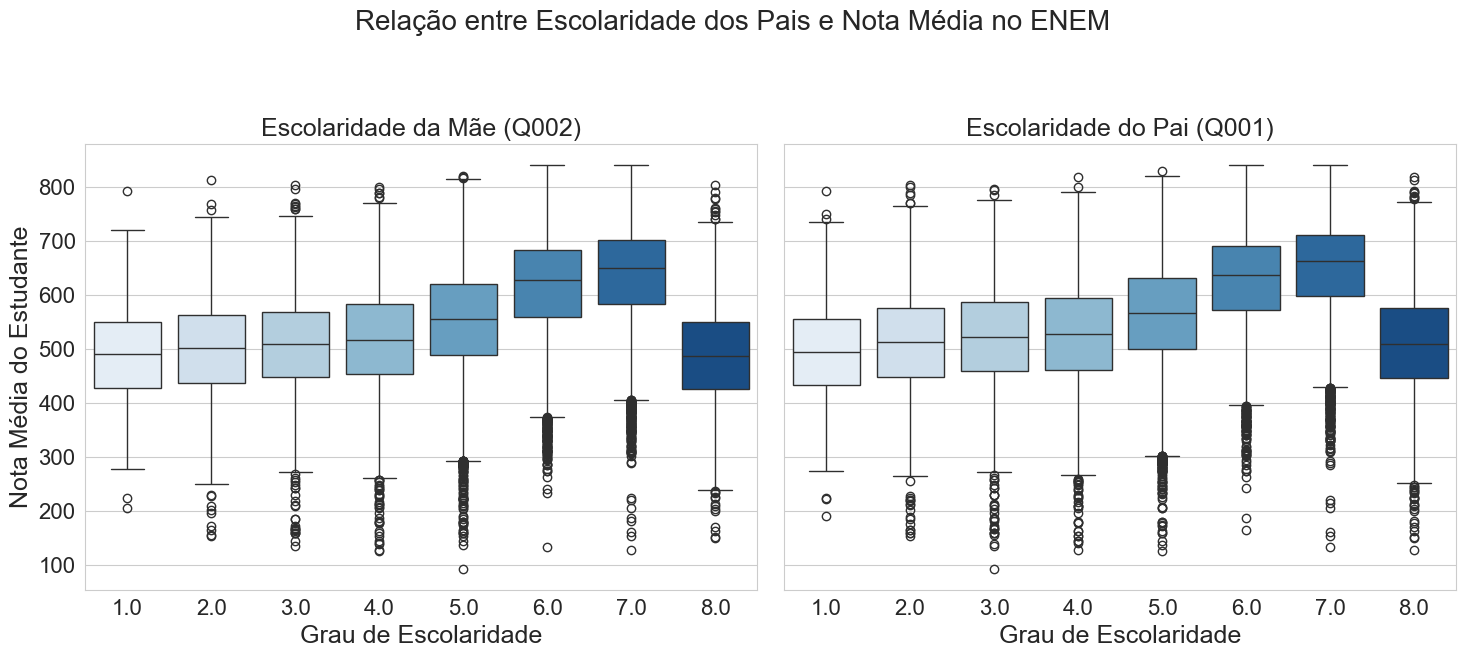

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Carregar o dataset
caminho_arquivo = r"C:\Users\CWS\Documents\meu\Bases clustering\microdados_enem_tratados5.csv"
df = pd.read_csv(caminho_arquivo, sep=";", encoding="latin1", dtype=str)
print("Tamanho do DataFrame após leitura:", df.shape)

# Definir as variáveis dependentes (notas) e independentes
variaveis_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "Q003", "Q001", "Q006", "Q008", "Q010", "Q011", "Q012", "Q013", "Q014", "Q022", "Q005", "Q024", "Q025", "Q002", "Q004", "TP_ESCOLA", "NO_MUNICIPIO_PROVA", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC"]

df = df[variaveis_notas + colunas_relevantes]
print("Tamanho do DataFrame após selecionar colunas relevantes:", df.shape)

# Converter colunas de notas para numéricas
df[variaveis_notas] = df[variaveis_notas].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes nas colunas de notas
df = df.dropna(subset=variaveis_notas)
print("Tamanho do DataFrame após remover valores ausentes nas notas:", df.shape)

# Mapear os valores de Q006 para numéricos
df["Q006"] = df["Q006"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17}).astype(float)

# Mapear valores categóricos de Q001 e Q002 para numéricos
mapeamento_escolaridade = {
    'A': 1,  # Nunca estudou
    'B': 2,  # Não completou a 4ª série/5º ano do Ensino Fundamental
    'C': 3,  # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
    'D': 4,  # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
    'E': 5,  # Completou o Ensino Médio, mas não completou a Faculdade
    'F': 6,  # Completou a Faculdade, mas não completou a Pós-graduação
    'G': 7,  # Completou a Pós-graduação
    'H': 8   # Não sei
}

# Aplicar o mapeamento às colunas Q001 e Q002
df["Q001"] = df["Q001"].map(mapeamento_escolaridade).astype(float)
df["Q002"] = df["Q002"].map(mapeamento_escolaridade).astype(float)

# Converter a coluna Q005 para numérico
df["Q005"] = pd.to_numeric(df["Q005"], errors='coerce')

# Agregação de dados (exemplo: média ponderada das notas por escola)
df["MEDIA_NOTA_ESCOLA"] = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

# Dividir os dados em treino e teste
X = df.drop(columns=variaveis_notas)  # Features
y = df["MEDIA_NOTA_ESCOLA"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Label Encoding para variáveis ordinais
variaveis_label_encoding = ["TP_FAIXA_ETARIA", "Q003", "Q001", "Q002", "Q024", "Q025", "Q010", "Q011", "Q008", "Q012", "Q014", "Q022", "Q013", "TP_ESCOLA","Q004","TP_DEPENDENCIA_ADM_ESC"]
label_encoders = {}

for col in variaveis_label_encoding:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Garantir consistência com treino
    label_encoders[col] = le

# Aplicar One-Hot Encoding para variáveis nominais
variaveis_one_hot = ["TP_SEXO", "TP_COR_RACA", "NO_MUNICIPIO_PROVA", "TP_LOCALIZACAO_ESC"]
X_train = pd.get_dummies(X_train, columns=variaveis_one_hot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=variaveis_one_hot, drop_first=True)

# Definir o tamanho da figura e criar dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Estilo dos gráficos
sns.set_style("whitegrid")

# Ajuste geral de tamanho de fonte
plt.rcParams.update({
    "axes.titlesize": 18,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 18
})

# Criar boxplot da escolaridade da mãe (Q002)
sns.boxplot(
    ax=axes[0],
    x="Q002",
    y="MEDIA_NOTA_ESCOLA",
    data=df,
    palette="Blues"
)
axes[0].set_title("Escolaridade da Mãe (Q002)")
axes[0].set_xlabel("Grau de Escolaridade")
axes[0].set_ylabel("Nota Média do Estudante")

# Criar boxplot da escolaridade do pai (Q001)
sns.boxplot(
    ax=axes[1],
    x="Q001",
    y="MEDIA_NOTA_ESCOLA",
    data=df,
    palette="Blues"
)
axes[1].set_title("Escolaridade do Pai (Q001)")
axes[1].set_xlabel("Grau de Escolaridade")
axes[1].set_ylabel("")

# Título geral
plt.suptitle("Relação entre Escolaridade dos Pais e Nota Média no ENEM", fontsize=20)

# Ajustar espaçamento
plt.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.savefig(r"C:\Users\CWS\Documents\meu\Meu TCC\imagem2\boxplot_escolaridade_pais.png", dpi=300)
plt.show()

In [5]:
import pandas as pd

# ---------------------------------------
# 1. TENTAR LER O ARQUIVO COM VÁRIOS PADRÕES
# ---------------------------------------

caminho = r"C:\Users\CWS\Documents\meu\Bases clustering\microdados_enem_tratados_6.csv"

# tentar leitura com ;
try:
    df = pd.read_csv(caminho, sep=';', decimal=',', low_memory=False)
except:
    # se der erro, tenta com ,
    df = pd.read_csv(caminho, sep=',', decimal='.', low_memory=False)

# ---------------------------------------
# 2. REMOVER ESPACOS E CARACTERES ESTRANHOS
# ---------------------------------------

df.columns = df.columns.str.strip()  # tira espaços invisíveis

# ---------------------------------------
# 3. CONVERTER TODAS AS COLUNAS POSSÍVEIS PARA NÚMEROS
# ---------------------------------------

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# outra tentativa: converter colunas que ainda estejam como string contendo números
df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', '.'),
                                     errors='ignore')
              if x.dtype == 'object' else x)

# ---------------------------------------
# 4. SELECIONAR SOMENTE COLUNAS NUMÉRICAS
# ---------------------------------------

df_num = df.select_dtypes(include='number')

print("Colunas numéricas detectadas:", df_num.columns.tolist(), "\n")

if df_num.empty:
    print("❌ Ainda sem colunas numéricas — seu arquivo provavelmente tem outro separador.")
else:
    print("✔ Colunas numéricas identificadas com sucesso.")

# ---------------------------------------
# 5. GERAR TABELA DESCRITIVA
# ---------------------------------------

desc = df_num.describe().T
moda = df_num.mode().iloc[0]
variancia = df_num.var()

tabela = desc.copy()
tabela["moda"] = moda
tabela["variancia"] = variancia

print("\nTABELA DESCRITIVA FINAL:\n")
print(tabela)

# ---------------------------------------
# 6. (Opcional) SALVAR NO EXCEL
# ---------------------------------------

# tabela.to_excel("tabela_descritiva_enem.xlsx")



C:\Users\CWS\AppData\Local\Temp\ipykernel_14260\2860811412.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\CWS\AppData\Local\Temp\ipykernel_14260\2860811412.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', '.'),


Colunas numéricas detectadas: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_FAIXA_ETARIA', 'TP_COR_RACA', 'Q003', 'Q001', 'Q006', 'Q008', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q023', 'Q022', 'Q005', 'Q024', 'Q025', 'Q002', 'Q004', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC'] 

✔ Colunas numéricas identificadas com sucesso.

TABELA DESCRITIVA FINAL:

                          count        mean         std  min    25%    50%  \
NU_NOTA_CN              48033.0  513.928062   92.850684  0.0  450.9  511.5   
NU_NOTA_CH              48033.0  543.070637   90.514648  0.0  485.5  551.6   
NU_NOTA_LC              48033.0  535.763361   77.077422  0.0  487.8  541.7   
NU_NOTA_MT              48033.0  574.058339  142.023532  0.0  459.1  573.2   
NU_NOTA_REDACAO         48033.0  700.536298  218.964948  0.0  580.0  740.0   
TP_FAIXA_ETARIA         48033.0   12.015947    2.097186  0.0   11.0   1

In [1]:
import pandas as pd

# ---------------------------------------
# 1. TENTAR LER O ARQUIVO COM VÁRIOS PADRÕES
# ---------------------------------------

caminho = r"C:\Users\CWS\Documents\meu\Bases clustering\microdados_enem_tratados_6.csv"

# tentar leitura com ';'
try:
    df = pd.read_csv(caminho, sep=';', decimal=',', low_memory=False)
except:
    # se der erro, tenta com ','
    df = pd.read_csv(caminho, sep=',', decimal='.', low_memory=False)

# ---------------------------------------
# 2. REMOVER ESPAÇOS E CARACTERES ESTRANHOS
# ---------------------------------------

df.columns = df.columns.str.strip()  # tira espaços invisíveis

# ---------------------------------------
# 3. CONVERTER TODAS AS COLUNAS POSSÍVEIS PARA NÚMEROS
# ---------------------------------------

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# converter strings com vírgula decimal
df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', '.'),
                                     errors='ignore')
              if x.dtype == 'object' else x)

# ---------------------------------------
# 4. SELECIONAR SOMENTE COLUNAS NUMÉRICAS
# ---------------------------------------

df_num = df.select_dtypes(include='number')

print("Colunas numéricas detectadas:", df_num.columns.tolist(), "\n")

if df_num.empty:
    print("❌ Ainda sem colunas numéricas — seu arquivo provavelmente tem outro separador.")
else:
    print("✔ Colunas numéricas identificadas com sucesso.")

# ---------------------------------------
# 5. GERAR TABELA DESCRITIVA
# ---------------------------------------

desc = df_num.describe().T
variancia = df_num.var()

# ---------------------------------------
# 6. CALCULAR MODA SEM CONSIDERAR ZERO
# ---------------------------------------

moda = {}

for col in df_num.columns:
    serie = df_num[col]

    # remover zeros e nulos
    valores_validos = serie[(serie != 0) & (~serie.isna())]

    if valores_validos.empty:
        moda[col] = None
    else:
        moda[col] = valores_validos.mode().iloc[0]

moda = pd.Series(moda)

# ---------------------------------------
# 7. CONSTRUIR A TABELA FINAL
# ---------------------------------------

tabela = desc.copy()
tabela["moda"] = moda
tabela["variancia"] = variancia

print("\nTABELA DESCRITIVA FINAL:\n")
print(tabela)


C:\Users\CWS\AppData\Local\Temp\ipykernel_23684\1762359952.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\CWS\AppData\Local\Temp\ipykernel_23684\1762359952.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', '.'),


Colunas numéricas detectadas: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_FAIXA_ETARIA', 'TP_COR_RACA', 'Q003', 'Q001', 'Q006', 'Q008', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q023', 'Q022', 'Q005', 'Q024', 'Q025', 'Q002', 'Q004', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC'] 

✔ Colunas numéricas identificadas com sucesso.

TABELA DESCRITIVA FINAL:

                          count        mean         std  min    25%    50%  \
NU_NOTA_CN              48033.0  513.928062   92.850684  0.0  450.9  511.5   
NU_NOTA_CH              48033.0  543.070637   90.514648  0.0  485.5  551.6   
NU_NOTA_LC              48033.0  535.763361   77.077422  0.0  487.8  541.7   
NU_NOTA_MT              48033.0  574.058339  142.023532  0.0  459.1  573.2   
NU_NOTA_REDACAO         48033.0  700.536298  218.964948  0.0  580.0  740.0   
TP_FAIXA_ETARIA         48033.0   12.015947    2.097186  0.0   11.0   1